In [10]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.optimizers import SGD

In [11]:
train_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                              zoom_range=0.2,
                              rescale=1/255)
test_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.1,
                                     height_shift_range=0.1,
                              zoom_range=0.2,
                              rescale=1/255)

In [12]:
train_gen = train_generator.flow_from_directory('../input/dogs-cats-images/dataset/training_set/')

Found 8000 images belonging to 2 classes.


In [13]:
test_gen = test_generator.flow_from_directory('../input/dogs-cats-images/dataset/test_set/')

Found 2000 images belonging to 2 classes.


In [14]:
x_train, y_train = next(train_gen)

In [15]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(include_top=False, input_shape=(256,256,3))

58892288/58889256 [==============================] - 2s 0us/step


In [16]:
for layers in vggmodel.layers:
    layers.trainable = False
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [17]:
vgg16_model = Sequential([
    vggmodel,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(2, activation='sigmoid')])

In [18]:
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 23,136,706
Trainable params: 8,422,018
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
vgg16_model.fit(x_train[0].reshape(1,256,256,3), y_train[0].reshape(1,2))

Epoch 1/1
1/1 [==============================] - 0s 380ms/step - loss: 0.4702 - accuracy: 1.0000


In [21]:
vgg16_model.fit_generator(generator=train_gen, samples_per_epoch=1000, validation_data=test_gen, epochs=50)

Epoch 1/50


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras.pre..., validation_data=<keras.pre..., epochs=50, steps_per_epoch=31)`
  """Entry point for launching an IPython kernel.


31/31 [==============================] - 70s 2s/step - loss: 0.7697 - accuracy: 0.6956 - val_loss: 0.3002 - val_accuracy: 0.8045
Epoch 2/50
31/31 [==============================] - 57s 2s/step - loss: 0.3483 - accuracy: 0.8508 - val_loss: 0.4600 - val_accuracy: 0.8737
Epoch 3/50
31/31 [==============================] - 56s 2s/step - loss: 0.3154 - accuracy: 0.8730 - val_loss: 0.9182 - val_accuracy: 0.7278
Epoch 4/50
31/31 [==============================] - 55s 2s/step - loss: 0.3582 - accuracy: 0.8493 - val_loss: 0.9465 - val_accuracy: 0.8183
Epoch 5/50
31/31 [==============================] - 55s 2s/step - loss: 0.3739 - accuracy: 0.8387 - val_loss: 0.2164 - val_accuracy: 0.8840
Epoch 6/50
31/31 [==============================] - 52s 2s/step - loss: 0.2341 - accuracy: 0.9042 - val_loss: 0.1353 - val_accuracy: 0.8857
Epoch 7/50
31/31 [==============================] - 53s 2s/step - loss: 0.2398 - accuracy: 0.9037 - val_loss: 0.3028 - val_accuracy: 0.8915
Epoch 8/50
31/31 [=============

In [22]:
import cv2
from skimage import io

In [23]:
import matplotlib.pyplot as plt

In [32]:
import joblib

In [33]:
joblib.dump(vgg16_model, 'dogs-vs-cat vgg16-9237.pkl')

['dogs-vs-cat vgg16-9237.pkl']

In [34]:
def predict(url):
    img = io.imread(url)
    img = cv2.resize(img, (256,256))
    img = img/255
    plt.imshow(img)
    pred = vgg16_model.predict(img.reshape(1,256,256,3))
    if(np.argmax(pred) == 0):
        print("Prediction : Cat","Confidence: {}%".format(round(pred[0][0]*100,2)))
    else:
        print("Prediction : Dog", "Confidence: {}%".format(round(pred[0][1]*100,2)))

Prediction : Cat Confidence: 70.93%


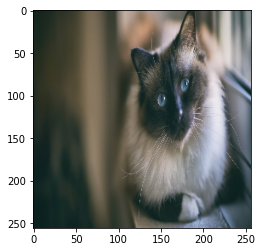

In [35]:
predict('https://cdn.kinsights.com/cache/93/9a/939a00a381fe6ec68af0a319bc4e3a15.jpg')